<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'>Using Callbacks with Tensorflow</h1>
</div>

## Content

1. Load the data.
    - Import Libraries.
    - Load datasets
2. Exploring the data.
3. Building the model.
4. Using Callbacks.
    - Early stopping.
    - ReduceLROnPlateau.
    - ModelCheckpoint.
5. Using custom callbacks.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Load the Data</h2>
</div>

In this section you will:

- Import the libraries.
- Load the dataset.

### 1.1 Import Libraries


In [15]:
#for system operations
import os

#machine learning tools
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import plot_model

#for data visualization
import matplotlib.pyplot as plt

#for data manipulation
import numpy as np

print(tf.__version__)

2.3.0


### 1.2 Load datasets

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(f"Training Shape: {x_train.shape} training labels: {y_train.shape} ")
print(f"Testing Shape: {x_test.shape} testing labels: {y_test.shape} ")

Training Shape: (60000, 28, 28) training labels: (60000,) 
Testing Shape: (10000, 28, 28) testing labels: (10000,) 


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Exploring the data</h2>
</div>

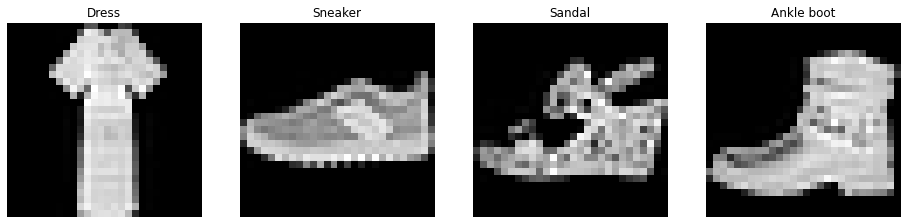

In [3]:
#available labels 
labels = {
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot'    
}

fig, axs = plt.subplots(1,4, figsize = (16,6))
for ax in axs:
    idx = np.random.randint(low = 0, high = len(x_train))
    label = labels[y_train[idx]]
    ax.imshow(x_train[idx], cmap = 'gray')
    ax.set_title(label)
    ax.axis("off")

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Building the model</h2>
</div>

In this section I will do a function to create the model.

In [4]:
def create_model(dense_layers,input_shape,n_classes):
    
    input_layer = Input(input_shape)
    for n,dense in enumerate(dense_layers):
        if n == 0:
            x = input_layer
            x = Flatten()(x)
            x = Dense(dense, activation = "relu")(x)
        else:
            x = Dense(dense, activation = "relu")(x)
        
    #last layer
    if n_classes == 2:
        act = "sigmoid"
    else:
        act = "softmax"
    
    x = Dense(n_classes, activation = act)(x)
    
    return Model(inputs = input_layer, outputs = x)        

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Using callbacks</h2>
</div>

First, I will do a function to plot the metrics, after that I will explore different kinds of callbacks.

In [6]:
def plot_metrics(history):
    plt.figure(figsize = (16,6)) 
    for key in history.history.keys():
        if "loss" in key.split("_"):
            plt.plot(history.history[key],'--', label = key)
        else:
            plt.plot(history.history[key], label = key)

    plt.xlabel("Epochs", fontsize = 16)
    plt.ylabel("Metric", fontsize = 16)
    plt.legend(loc = "best")
    plt.grid()
    plt.show()

In [5]:
# earlystopping
early_stop = EarlyStopping(monitor = "val_loss", patience = 5, mode="min")

#reducelronplateau
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=2, verbose=2, mode="min")

#model_checkpoint
model_checkpoint = ModelCheckpoint('model.{epoch:02d}-{val_loss:0.2f}.h5', verbose = 1, 
                                   monitor = "val_loss",save_best_only=True)

  
#creating the model
classifier = create_model([32,16],x_train.shape[1:],len(np.unique(y_train)))

#compile
classifier.compile(
    optimizer = "adam",
    loss = 'sparse_categorical_crossentropy',
    metrics = ["acc"],
)

history = classifier.fit(
    x_train,
    y_train,
    epochs = 50,
    validation_data = (x_test,y_test),
    verbose = 1,
    callbacks = [early_stop, reduce_lr, model_checkpoint]
)

Epoch 1/50
1854/1875 [============================>.] - ETA: 0s - loss: 2.3366 - acc: 0.3859
Epoch 00001: val_loss improved from inf to 1.36994, saving model to model.01-1.37.h5
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3247 - acc: 0.3872 - val_loss: 1.3699 - val_acc: 0.4564
Epoch 2/50
1839/1875 [============================>.] - ETA: 0s - loss: 1.1848 - acc: 0.517 - ETA: 0s - loss: 1.1836 - acc: 0.5180
Epoch 00002: val_loss improved from 1.36994 to 1.12670, saving model to model.02-1.13.h5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1829 - acc: 0.5181 - val_loss: 1.1267 - val_acc: 0.5367
Epoch 3/50
1859/1875 [============================>.] - ETA: 0s - loss: 0.9747 - acc: 0.5968
Epoch 00003: val_loss improved from 1.12670 to 0.95317, saving model to model.03-0.95.h5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9743 - acc: 0.5971 - val_loss: 0.9532 - val_acc: 0.6240
Epoch 4/50
1874/1875 [============================>

1849/1875 [============================>.] - ETA: 0s - loss: 0.3854 - acc: 0.8638
Epoch 00028: val_loss did not improve from 0.49084
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3852 - acc: 0.8638 - val_loss: 0.4920 - val_acc: 0.8366


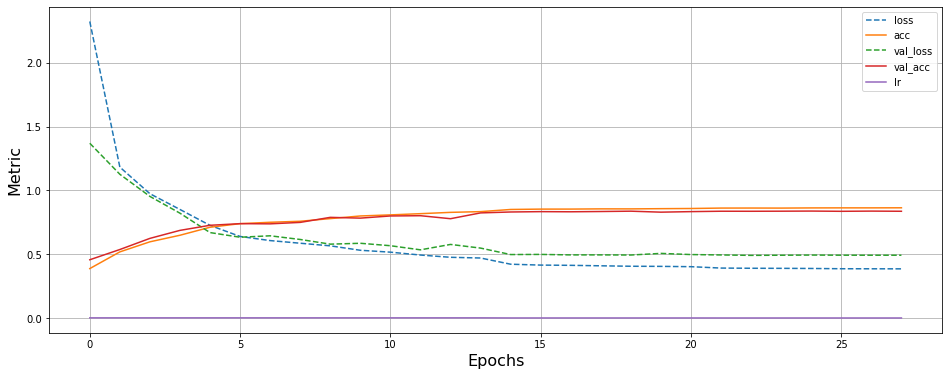

In [7]:
#plotting the metrics
plot_metrics(history)

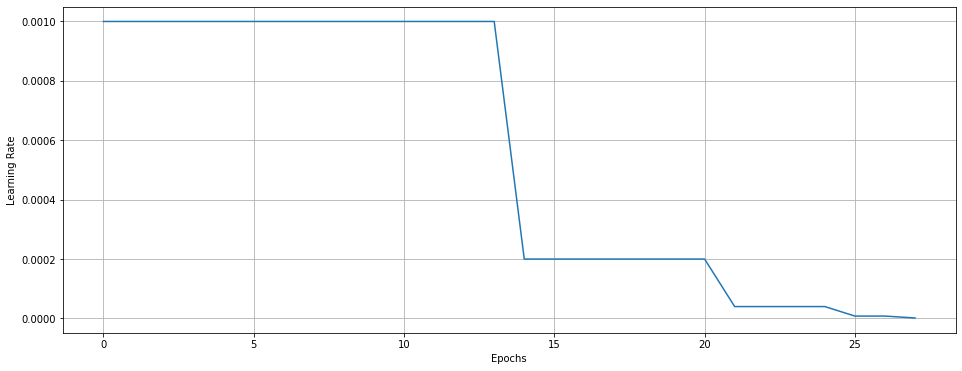

In [8]:
#plotting the learning rate behavior
plt.figure(figsize = (16,6))
plt.plot(history.history["lr"])
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.grid()

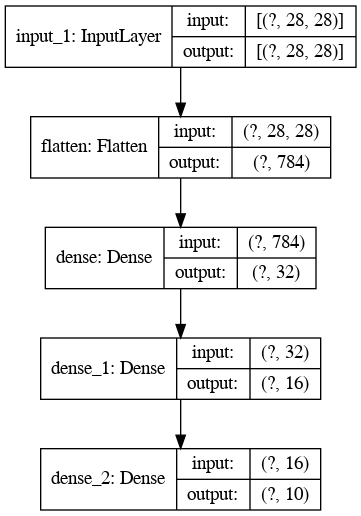

In [9]:
#plotting the model architecture
plot_model(classifier, show_shapes=True)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. Using custom callbacks</h2>
</div>

Let's explore an example of how to use custom callbacks for specific tasks.

In [12]:
class DetectOverfittingCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(DetectOverfittingCallback, self).__init__()
        self.threshold = threshold
        
    def on_epoch_end(self, epoch, logs = None):
        ratio = logs["val_loss"]/logs["loss"]
        print("Epoch: {}, Val/Train loss ratio: {:.2f}".format(epoch, ratio))
        
        if ratio > threshold:
            print("Stopping training...")
            self.model.stop_training = True

threshold = 1.25
custom_callback = DetectOverfittingCallback(threshold)

classifier_cc = create_model([32,16],x_train.shape[1:],len(np.unique(y_train)))

#compile
classifier_cc.compile(
    optimizer = "adam",
    loss = 'sparse_categorical_crossentropy',
    metrics = ["acc"]
)

history_cc = classifier_cc.fit(
    x_train,
    y_train,
    epochs = 50,
    validation_data = (x_test,y_test),
    verbose = 1,
    callbacks = [custom_callback]
)

Epoch 1/50
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1208 - acc: 0.4808 - val_loss: 1.0009 - val_acc: 0.6435
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7635 - acc: 0.7152 - val_loss: 0.6959 - val_acc: 0.7243
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6500 - acc: 0.7391 - val_loss: 0.6702 - val_acc: 0.7331
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6169 - acc: 0.7507 - val_loss: 0.6263 - val_acc: 0.7502
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5839 - acc: 0.7696 - val_loss: 0.6110 - val_acc: 0.7758
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5546 - acc: 0.7872 - val_loss: 0.5714 - val_acc: 0.7998
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5299 - acc: 0.8177 - val_loss: 0.6037 - val_acc: 0.8194
Epoch 8/50
1875/1875 [==============================] - 3s 1ms

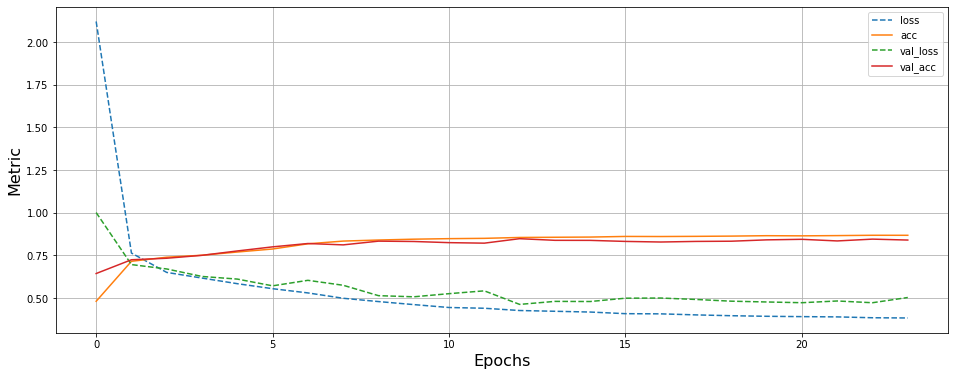

In [14]:
plot_metrics(history_cc)